### Table of content

#### 1. Importing libraries

#### 2. Importing data

#### 3. Plotting a bar chart

#### 4. Plotting a histogram

#### 5. Scatterplot

#### 6. Adhoc data cleaning

#### 7. Sampling data

#### 8. Line chart

#### 9. Exporting data visualization

#### Importing libraries

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### importing data

In [6]:
path = r"C:\Users\tseki\OneDrive\Documents\Careerfoundry\Data immersion\Achievement 4\Instacart Basket Analysis 8-6-22"

In [7]:
df_ords_prods_aggregated = pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', 'ords_prods_aggregated.pkl'))

#### plotting a bar chart

<AxesSubplot:>

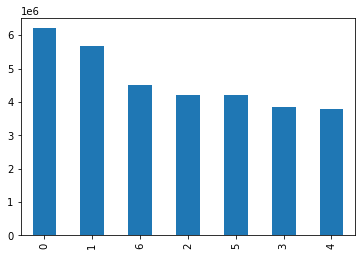

In [8]:
# Create a bar chart (.plot.bar() uses the pandas libray)
df_ords_prods_aggregated['orders_day_of_week'].value_counts().plot.bar()


Text(0.5, 1.0, 'Orders per week')

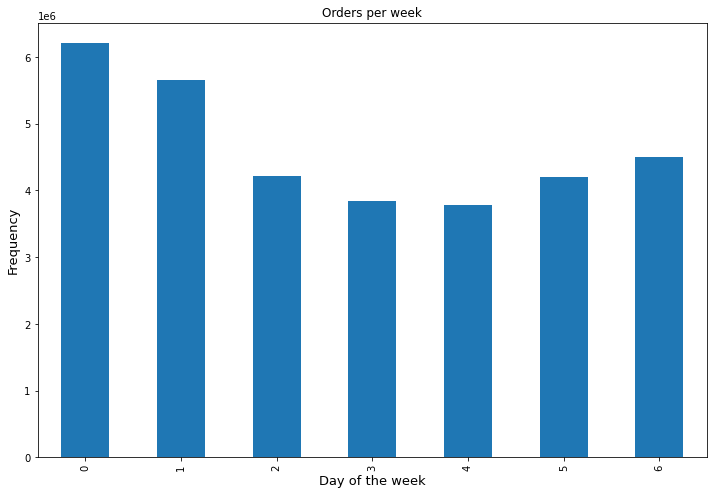

In [36]:
# you can rearrange the order of the bar chart by using the function sort_index

orders_per_week = df_ords_prods_aggregated['orders_day_of_week'].value_counts().sort_index().plot.bar(figsize = (12,8))

plt.xlabel('Day of the week', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Orders per week')

In [10]:
# you can aslo use sort_index when printing frequencies
df_ords_prods_aggregated['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

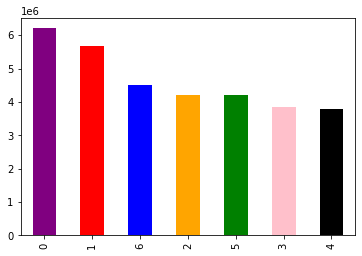

In [11]:
# to make your bar chart more distinct you can change the colour
bar = df_ords_prods_aggregated['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'blue', 'orange', 'green', 'pink', 'black'])

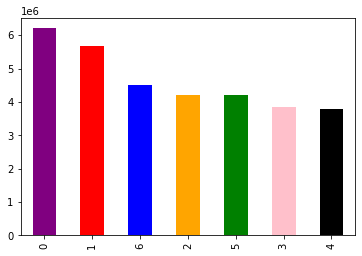

In [12]:
# printing bar
bar.figure

In [13]:
# export bar outside of Jupyter in the form of an image file
bar.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_orders_dow.png'))

#### Plotting  a histogram

<AxesSubplot:ylabel='Frequency'>

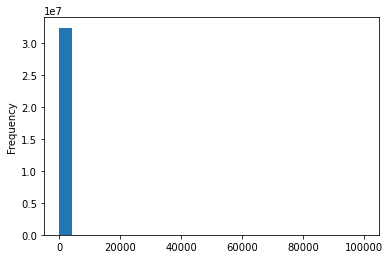

In [14]:
df_ords_prods_aggregated['prices'].plot.hist(bins = 25)

In [15]:
# checking info on the prices column
df_ords_prods_aggregated['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [16]:
# checking for each specific stats
df_ords_prods_aggregated['prices'].mean()

11.980225638375474

In [17]:
df_ords_prods_aggregated['prices'].median()

7.4

In [18]:
df_ords_prods_aggregated['prices'].max()

99999.0

In [19]:
# clearly something is off with the maximum value of $99,999

#### Scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

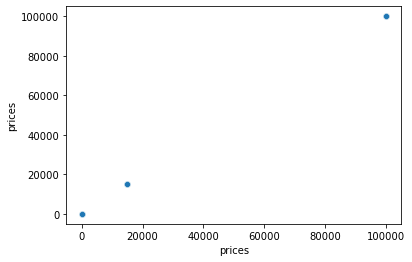

In [20]:
# This can give an insight on the distribution of the datapoints. hence, outliers can be spotted easily
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_aggregated)

#### Adhoc data cleaning

In [21]:
# the mean of the prices is around $12, however from the scatter plot you can tell that there are prices around $20,000 
#and even $99,999. 
# Assuming the maximum price of an item in a supermarket is $100, let's print the data of all items that are considered outliers

df_ords_prods_aggregated.loc[df_ords_prods_aggregated['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,both,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,both,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,both,Regularly busy,Regularly busy,Regular orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,both,Busiest day,Busiest day,Regular orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,both,Regularly busy,Busiest day,Regular orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,both,Busiest day,Busiest day,Regular orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,both,Busiest day,Busiest day,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,both,Regularly busy,Least busy,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,both,Regularly busy,Least busy,Regular orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [22]:
# For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column.
# To turn them into NaNs, use the following code:

df_ords_prods_aggregated.loc[df_ords_prods_aggregated['prices'] >100, 'prices'] = np.nan

In [23]:
# check if replacement was successful by checking for max value
df_ords_prods_aggregated['prices'].max()

25.0

Text(0.5, 0, 'Price')

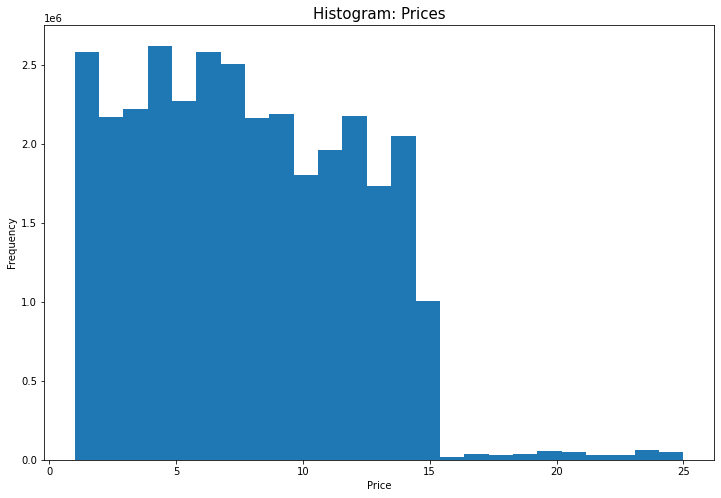

In [38]:
# replotting histogram after adhoc data cleaning
hist = df_ords_prods_aggregated['prices'].plot.hist(bins = 25, figsize = (12,8))

plt.title('Histogram: Prices', fontsize=15)
plt.xlabel('Price')


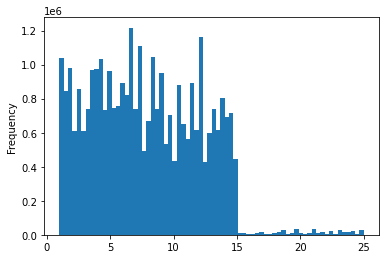

In [25]:
# To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70. 
#This will result in a histogram with more, thinner columns:

hist_2 = df_ords_prods_aggregated['prices'].plot.hist(bins = 70)

#### Exporting histogram

In [26]:
hist.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'hist_prices.png'))

#### Sampling data

The value you put inside the seed doesn’t actually matter in the grand scheme of things. Whether you use 1, 52, 179, or 4, all you’re doing is ensuring that the random distribution you’re creating is reproducible.

In [27]:
# create a list holding True/False values to the test np.random.rand <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_aggregated)) <= 0.7

In [28]:
# store 70% of the sample in the dataframe big (i.e all Trues)
big = df_ords_prods_aggregated[dev]

In [29]:
# store 30% of the sample in the dataframe small (i.e all False)
small = df_ords_prods_aggregated[~dev]

In [30]:
# confirming output
len(df_ords_prods_aggregated)

32404859

In [31]:
len(big) + len(small)

32404859

In [32]:
# Specifying only the needed colum for the line chart
df_2 = small[['orders_day_of_week','prices']]

In [33]:
# checking output
df_2.head()

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


#### Creating the line chart

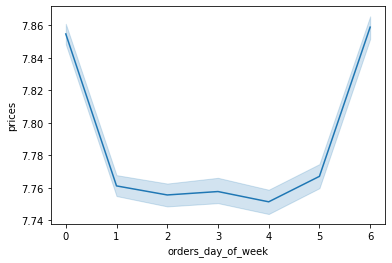

In [34]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [35]:
# Exporting data since i performed some adhoc cleaning here

df_ords_prods_aggregated.to_pickle(os.path.join(path, 'Data', 'Prepared data', 'ords_prods_aggregated2.pkl'))

### Exporting data viz


In [41]:
orders_per_week.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'orders_per_week.png'))

In [40]:
hist.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'hist_prices.png'))